In [2]:
import data_processing as dp

# Case dataframes over all different locations w/ different wages
# Data on population and median income from:
# https://www.census.gov/quickfacts/table/PST045215/0457380

dacha_file = 'digital_dacha_data_2024.csv'
population_file = 'Population.csv'

df = dp.process_data(dacha_file, population_file)

# Fixed cost associated with operating a store
fixed_cost = 500_000

# Grand Junction
GJ_Wage_Expert = 4_500
GJ_Wage_Staff = 1_160
GJ_pop_estimate = 69_412
GJ_med_inc_estimate = 62_993
GJ_recommendation_df = dp.calculate_recommended_staffing(df, GJ_Wage_Expert, GJ_Wage_Staff, GJ_pop_estimate, GJ_med_inc_estimate, Contribution_Margin=100, Rev=1000)


# St. George
SG_Wage_Expert = 4_500
SG_Wage_Staff = 2_000
SG_pop_estimate = 104_578
SG_med_inc_estimate = 69_333
SG_recommendation_df = dp.calculate_recommended_staffing(df, SG_Wage_Expert, SG_Wage_Staff, SG_pop_estimate, SG_med_inc_estimate, Contribution_Margin=100, Rev=1000)

# Prescott
Prescott_Wage_Expert = 4_500
Prescott_Wage_Staff = 1_160
Prescott_pop_estimate = 47_757
Prescott_med_inc_estimate = 66_330
Prescott_recommendation_df = dp.calculate_recommended_staffing(df, Prescott_Wage_Expert, Prescott_Wage_Staff, Prescott_pop_estimate, Prescott_med_inc_estimate, Contribution_Margin=100, Rev=1000)

# Prescott Min Wage Raised to $15
P_Increase_Min_Wage_Expert = 6_000
P_min_wage_recommendation_df = dp.calculate_recommended_staffing(df, P_Increase_Min_Wage_Expert, Prescott_Wage_Staff, Prescott_pop_estimate, Prescott_med_inc_estimate, Contribution_Margin=100, Rev=1000)

# Rexburg Idaho, Smaller Market
Rex_Wage_Expert = 4_500
Rex_Wage_Staff = 1_160
Rex_pop_estimate = 39_975
Rex_med_inc_estimate = 46_286
Rex_recommendation_df = dp.calculate_recommended_staffing(df, Rex_Wage_Expert, Rex_Wage_Staff, Rex_pop_estimate, Rex_med_inc_estimate, Contribution_Margin=100, Rev=1000)



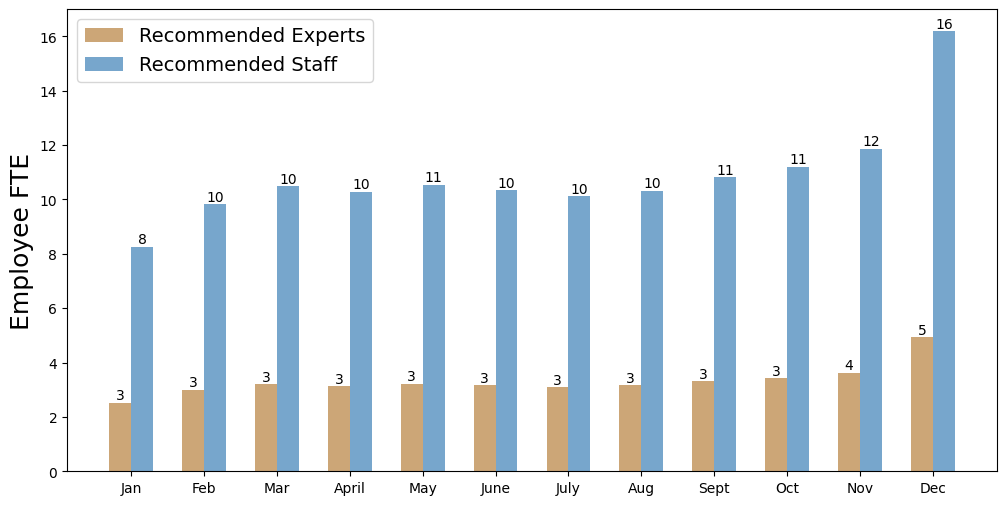

In [4]:
import matplotlib.pyplot as plt

# Define the DataFrame
df_to_use = P_min_wage_recommendation_df

# Create the bar plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar([m - 0.15 for m in df_to_use['Month']], df_to_use['RecExperts'], width=0.3, label='Recommended Experts', color='#cca677')
bars2 = plt.bar([m + 0.15 for m in df_to_use['Month']], df_to_use['RecStaff'], width=0.3, label='Recommended Staff', color='#77a6cc')

# Adding labels and title
plt.ylabel('Employee FTE', fontsize = 18)

# Month dictionary
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Convert the month numbers to month names
month_names = [month_dict[m] for m in df_to_use['Month']]

# Set the x-ticks to the month names
plt.xticks(df_to_use['Month'], month_names)

# Add the numbers on top of the bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height)}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height)}', ha='center', va='bottom', fontsize=10)

# Show legend with updated labels
plt.legend(fontsize = 14)

# Display the plot
plt.show()
